# You need to implement Logistic Regression from scratch in this question<br>


### 1. loading data and splitting into train and test set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X = np.load("X.npy") # image
y = np.load("Y.npy") # label

In [2]:
# flattening the data
X = np.reshape(X, (X.shape[0], -1))
X.shape,y.shape

((2062, 4096), (2062, 10))

In [3]:
#splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 50)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(1443, 4096) (1443, 10)
(619, 4096) (619, 10)


In [4]:
y_train_label=[np.where(r==1)[0][0] for r in y_train]
y_train_label=np.array(y_train_label)
y_test_label=[np.where(r==1)[0][0] for r in y_test]
y_test_label=np.array(y_test_label)
print(y_train_label.shape,y_test_label.shape)

(1443,) (619,)


### 2. Plot a diagram for the sigmoid function. This is used for binary classification. How do you modify it for multilabel dataset classification problems? State and Explain the methods used.

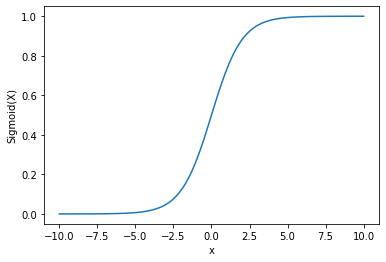

In [5]:
import math 
  
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show() 

## 3.a ONE VS ALL METHOD

In [6]:
class LogisticRegression:

    def __init__(self, learning_rate=0.01, n_iters=2000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None # theta
#         theta = np.zeros((Y_train.shape[1],X_train.shape[1]))
        self.bias = None
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros((y.shape[1],X.shape[1]))
        self.bias = 0

        # gradient descent
        cost_arr = np.empty((0,y.shape[1]))
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights.T) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)
            
#             print(y.shape, y_predicted.shape)
            cost = -1/n_samples * ((y * np.log(y_predicted)) + ((1-y) * np.log(1 - y_predicted)))
            cost = cost.sum(axis = 0)
            cost_arr = np.vstack((cost_arr, cost))

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
#             print(dw.shape, self.weights.shape)
            self.weights -= self.lr * dw.T
            self.bias -= self.lr * db
        return self.weights, cost_arr

    def predict(self, X):
        y_predicted_cls = []
        linear_model = np.dot(X, self.weights.T) + self.bias
        y_predicted = self._sigmoid(linear_model)

        for row in y_predicted:
            y_predicted_cls.append(np.argmax(row))
#         y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)


In [7]:
ova = LogisticRegression()
theta, cost_arr = ova.fit(X_train, y_train)
print(theta.shape, cost_arr.shape)
pred = ova.predict(X_test)

(10, 4096) (2000, 10)


In [8]:
print(pred.shape)
print(pred[:10])
print(y_test_label[:10])

(619,)
[8 0 5 8 0 4 2 1 0 3]
[8 0 5 4 0 4 6 1 0 3]


In [9]:
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix\n",confusion_matrix(y_test_label, pred))
print("\nClassification Report\n",classification_report(y_test_label, pred))

Confusion Matrix
 [[58  0  0  1  1  3  4  0  0  3]
 [ 3 50  0  4  4  2  2  0  0  0]
 [ 1  2 28  0  5  3  3  0  6  0]
 [ 0  1  3 44  1  0  8  1  2  0]
 [ 1  0  0  0 57  2  1  0  4  0]
 [ 5  0  3  2  2 46  1  0  1  0]
 [ 1  1  5  8  0  0 34  0  0  2]
 [ 0  0  1  0  2  1  0 56  4  7]
 [ 0  1  6  3  6  1  0  0 48  0]
 [ 3  0  0  0  1  1  2  3  0 54]]

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        70
           1       0.91      0.77      0.83        65
           2       0.61      0.58      0.60        48
           3       0.71      0.73      0.72        60
           4       0.72      0.88      0.79        65
           5       0.78      0.77      0.77        60
           6       0.62      0.67      0.64        51
           7       0.93      0.79      0.85        71
           8       0.74      0.74      0.74        65
           9       0.82      0.84      0.83        64

    accuracy                   

### plotting costs for different classes

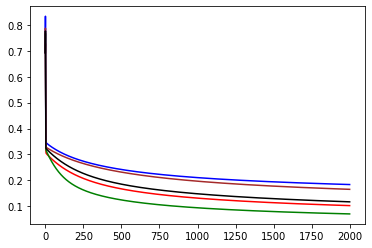

In [10]:
plt.plot(cost_arr[:,0], label='class 0', c='red')
plt.plot(cost_arr[:,1], label='class 1', c='green')
plt.plot(cost_arr[:,2], label='class 2', c='blue')
plt.plot(cost_arr[:,3], label='class 3', c='brown')
plt.plot(cost_arr[:,4], label='class 4', c='black')
plt.show()

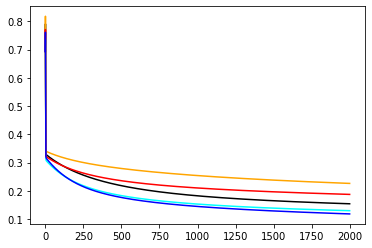

In [11]:
plt.plot(cost_arr[:,5], label='class 5', c='black')
plt.plot(cost_arr[:,6], label='class 7', c='orange')
plt.plot(cost_arr[:,7], label='class 8', c='cyan')
plt.plot(cost_arr[:,8], label='class 9', c='red')
plt.plot(cost_arr[:,9], label='class 10', c='blue')
plt.show()

# 3.b ONE VS ONE METHOD

In [12]:
import statistics
X = np.load("X.npy") # image
y = np.load("Y.npy") # label
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.30, random_state=42)

Y_train_label = [np.where(r==1)[0][0] for r in Y_train]
Y_test_label = [np.where(r==1)[0][0] for r in Y_test]

Y_train_label, Y_test_label = np.array(Y_train_label), np.array(Y_test_label)


# number_of_train = X_train.shape[0]
# number_of_test = X_test.shape[0]
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [26]:
print(X.shape,y.shape)
print("\nafter train test split")
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)
print("\nafter converting y into y_labels")
print(y_train_label.shape,y_test_label.shape)
# (2062, 64, 64) (2062, 10)

# after train test split
# (1443, 4097) (1443, 10)
# (619, 4097) (619, 10)

# after converting y into y_labels
# (1443,) (619,)

(2062, 64, 64) (2062, 10)

after train test split
(1443, 64, 64) (1443, 10)
(619, 64, 64) (619, 10)

after converting y into y_labels
(1443,) (619,)


In [20]:
class multiclassLG:
    def __init__(self, learning_rate=0.001, n_iters=2000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.Combinations = {"combination":[],"weight":[]}
        
    def _sigmoid(self,z):
        return 1 / (1 + np.exp(-z))

    def logistic_regression(self,X_train,Y_train):

        n_samples , n_features = X_train.shape
        
        Y_train = Y_train.reshape(Y_train.shape[0],1)
        
        theta = np.zeros((Y_train.shape[1],n_features))
        cost_arr = np.empty((0,Y_train.shape[1]))
        
        for i in range(0,self.n_iters):
            lineq = np.dot(X_train, theta.T)
            h = self._sigmoid(lineq)
            cost = -1/n_samples * ((Y_train * np.log(h)) + ((1-Y_train) * np.log(1-h)))
            cost = cost.sum(axis = 0)
            cost_arr = np.vstack((cost_arr, cost))
            
            dw = 1/n_samples * np.dot((h-Y_train).T, X_train)
#             delta = (self.lr/n_samples) * np.dot((h-Y_train).T, X_train)
            theta -= self.lr * dw
        return theta,cost_arr
    
    def fit_model(self, X_train, Y_train):
        
        for i in range(0,Y_train.shape[1]):
            for j in range(i+1,Y_train.shape[1]):
                X_subset = [] 
                Y_subset = []
                for idx,label in enumerate(Y_train_label):
                    if label == i:
                        X_subset.append(X_train[idx])
                        Y_subset.append(0)
                    elif label == j:
                        X_subset.append(X_train[idx])
                        Y_subset.append(1)
                        
                X_subset = np.array(X_subset)
                Y_subset = np.array(Y_subset)
                
                theta,cost_arr = self.logistic_regression(X_subset,Y_subset)
                
                theta = theta.reshape(theta.shape[1])
                self.Combinations["combination"].append([i,j])
                self.Combinations["weight"].append(theta)

    def predict_val(self,X_test):
        Combination = np.array(self.Combinations["combination"])
        thetas = np.array(self.Combinations["weight"])
#         print(thetas.shape)
        
        y_pred = []
        for test_row in X_test:
            test_row = test_row.reshape(test_row.shape[0],1)
            _mode = []
            model_predict = self._sigmoid(np.dot(test_row.T, thetas.T))
#             print(model_predict)
            for i in range(model_predict.shape[1]):
                if model_predict[0][i] > 0.5:
                    _mode.append(Combination[i][1])
                else:
                    _mode.append(Combination[i][0])
            y_pred.append(statistics.mode(_mode))
        return y_pred
        


In [21]:
obj = multiclassLG()
obj.fit_model(X_train, Y_train)
y_pred = obj.predict_val(X_test)

In [22]:
print("Confusion Matrix\n",confusion_matrix(Y_test_label, y_pred))
print("\nClassification Report\n",classification_report(Y_test_label, y_pred))

Confusion Matrix
 [[50  1  0  0  0  0  4  0  0  0]
 [ 0 58  1  3  1  1  5  0  1  0]
 [ 1  2 51  2  7  3  3  0  7  0]
 [ 0  2  6 40  1  1  3  1  9  0]
 [ 0  6  0  1 39  4  0  0  2  0]
 [ 3  1  6  1  2 39  0  0  2  1]
 [ 2  2  9 10  0  8 26  0  4  4]
 [ 4  1  1  0  2  0  0 50  3  1]
 [ 0  2  7  2  7  1  1  2 38  0]
 [ 1  0  0  0  0  0  3  7  0 50]]

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.91      0.86        55
           1       0.77      0.83      0.80        70
           2       0.63      0.67      0.65        76
           3       0.68      0.63      0.66        63
           4       0.66      0.75      0.70        52
           5       0.68      0.71      0.70        55
           6       0.58      0.40      0.47        65
           7       0.83      0.81      0.82        62
           8       0.58      0.63      0.60        60
           9       0.89      0.82      0.85        61

    accuracy                   

## 4. sklearn

In [27]:
X_sk = np.load("X.npy") # image
y_sk = np.load("Y.npy") # label
X_sk = np.reshape(X, (X.shape[0], -1))
X_traink, X_testk, y_traink, y_testk = train_test_split(X_sk,y_sk, test_size = 0.30, random_state = 50)
y_train_labelk=[np.where(r==1)[0][0] for r in y_traink]
y_train_labelk=np.array(y_train_labelk)
y_test_labelk=[np.where(r==1)[0][0] for r in y_testk]
y_test_labelk=np.array(y_test_labelk)

In [28]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42, max_iter = 1000)
logreg.fit(X_traink, y_train_labelk)
ypredk=logreg.predict(X_testk)
print("Confusion Matrix\n",confusion_matrix(y_test_labelk, ypredk))
print("\nClassification Report\n",classification_report(y_test_labelk, ypredk))

Confusion Matrix
 [[58  0  1  2  1  4  0  1  0  3]
 [ 2 52  0  1  3  2  5  0  0  0]
 [ 0  1 29  1  4  2  5  0  6  0]
 [ 0  1  2 40  1  2  9  0  5  0]
 [ 0  0  2  0 54  0  1  1  7  0]
 [ 5  0  5  3  2 44  1  0  0  0]
 [ 0  0  3 10  0  1 35  0  0  2]
 [ 0  0  1  0  1  1  0 62  5  1]
 [ 0  2  4  5  4  0  1  0 49  0]
 [ 2  0  0  0  0  2  4  3  0 53]]

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.83      0.85        70
           1       0.93      0.80      0.86        65
           2       0.62      0.60      0.61        48
           3       0.65      0.67      0.66        60
           4       0.77      0.83      0.80        65
           5       0.76      0.73      0.75        60
           6       0.57      0.69      0.62        51
           7       0.93      0.87      0.90        71
           8       0.68      0.75      0.72        65
           9       0.90      0.83      0.86        64

    accuracy                   

## Comparison and Conclusion

On comparing the three results from one vs all, one vs one and slearn we see that accuracy is almost same.
A  possible  downside  of one vs one approach  is  that  it  requires  one  model  to  be  created  for  each  class. This could be an issue for large datasets (e.g.  millions of rows), slow models (e.g.  neural networks), or very large numbers of classes (e.g.  hundreds of classes).

## Bonus

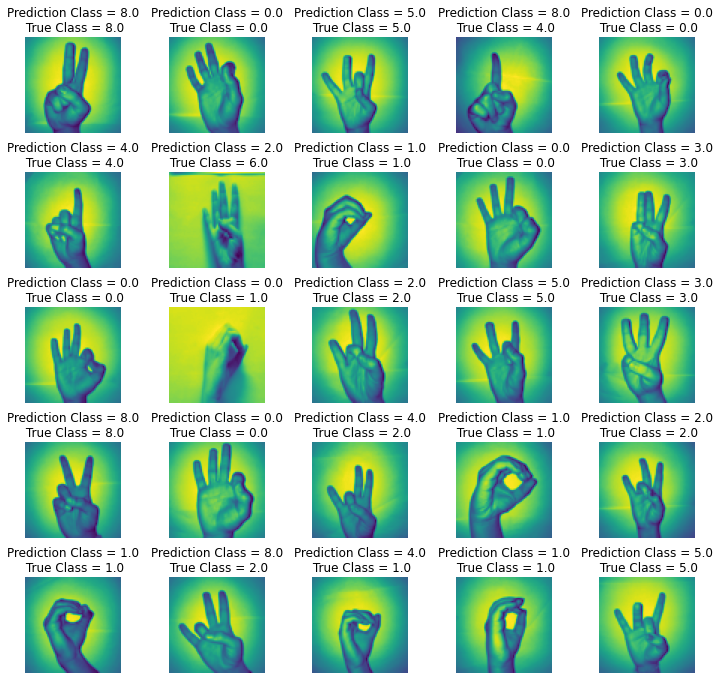

In [29]:
#Visualize predictions
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
# X_test = X_test[:,1:]
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(64,64))
    axes[i].set_title(f"Prediction Class = {pred[i]:0.1f}\n True Class = {y_test_label[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)